<a href="https://colab.research.google.com/github/Rishav273/Ineuron-Assignments/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_boston
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Taking a look at the dataframe:

In [17]:
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['Price'] = boston.target     # target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
bos.shape

(506, 14)

In [34]:
# Checking basic descriptive statistics:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


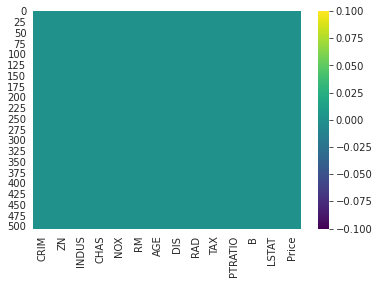

In [33]:
# Checking for missing values:
sns.heatmap(bos.isna(),cmap='viridis')

No missing values in the dataset.

## Exploratory data anaysis:

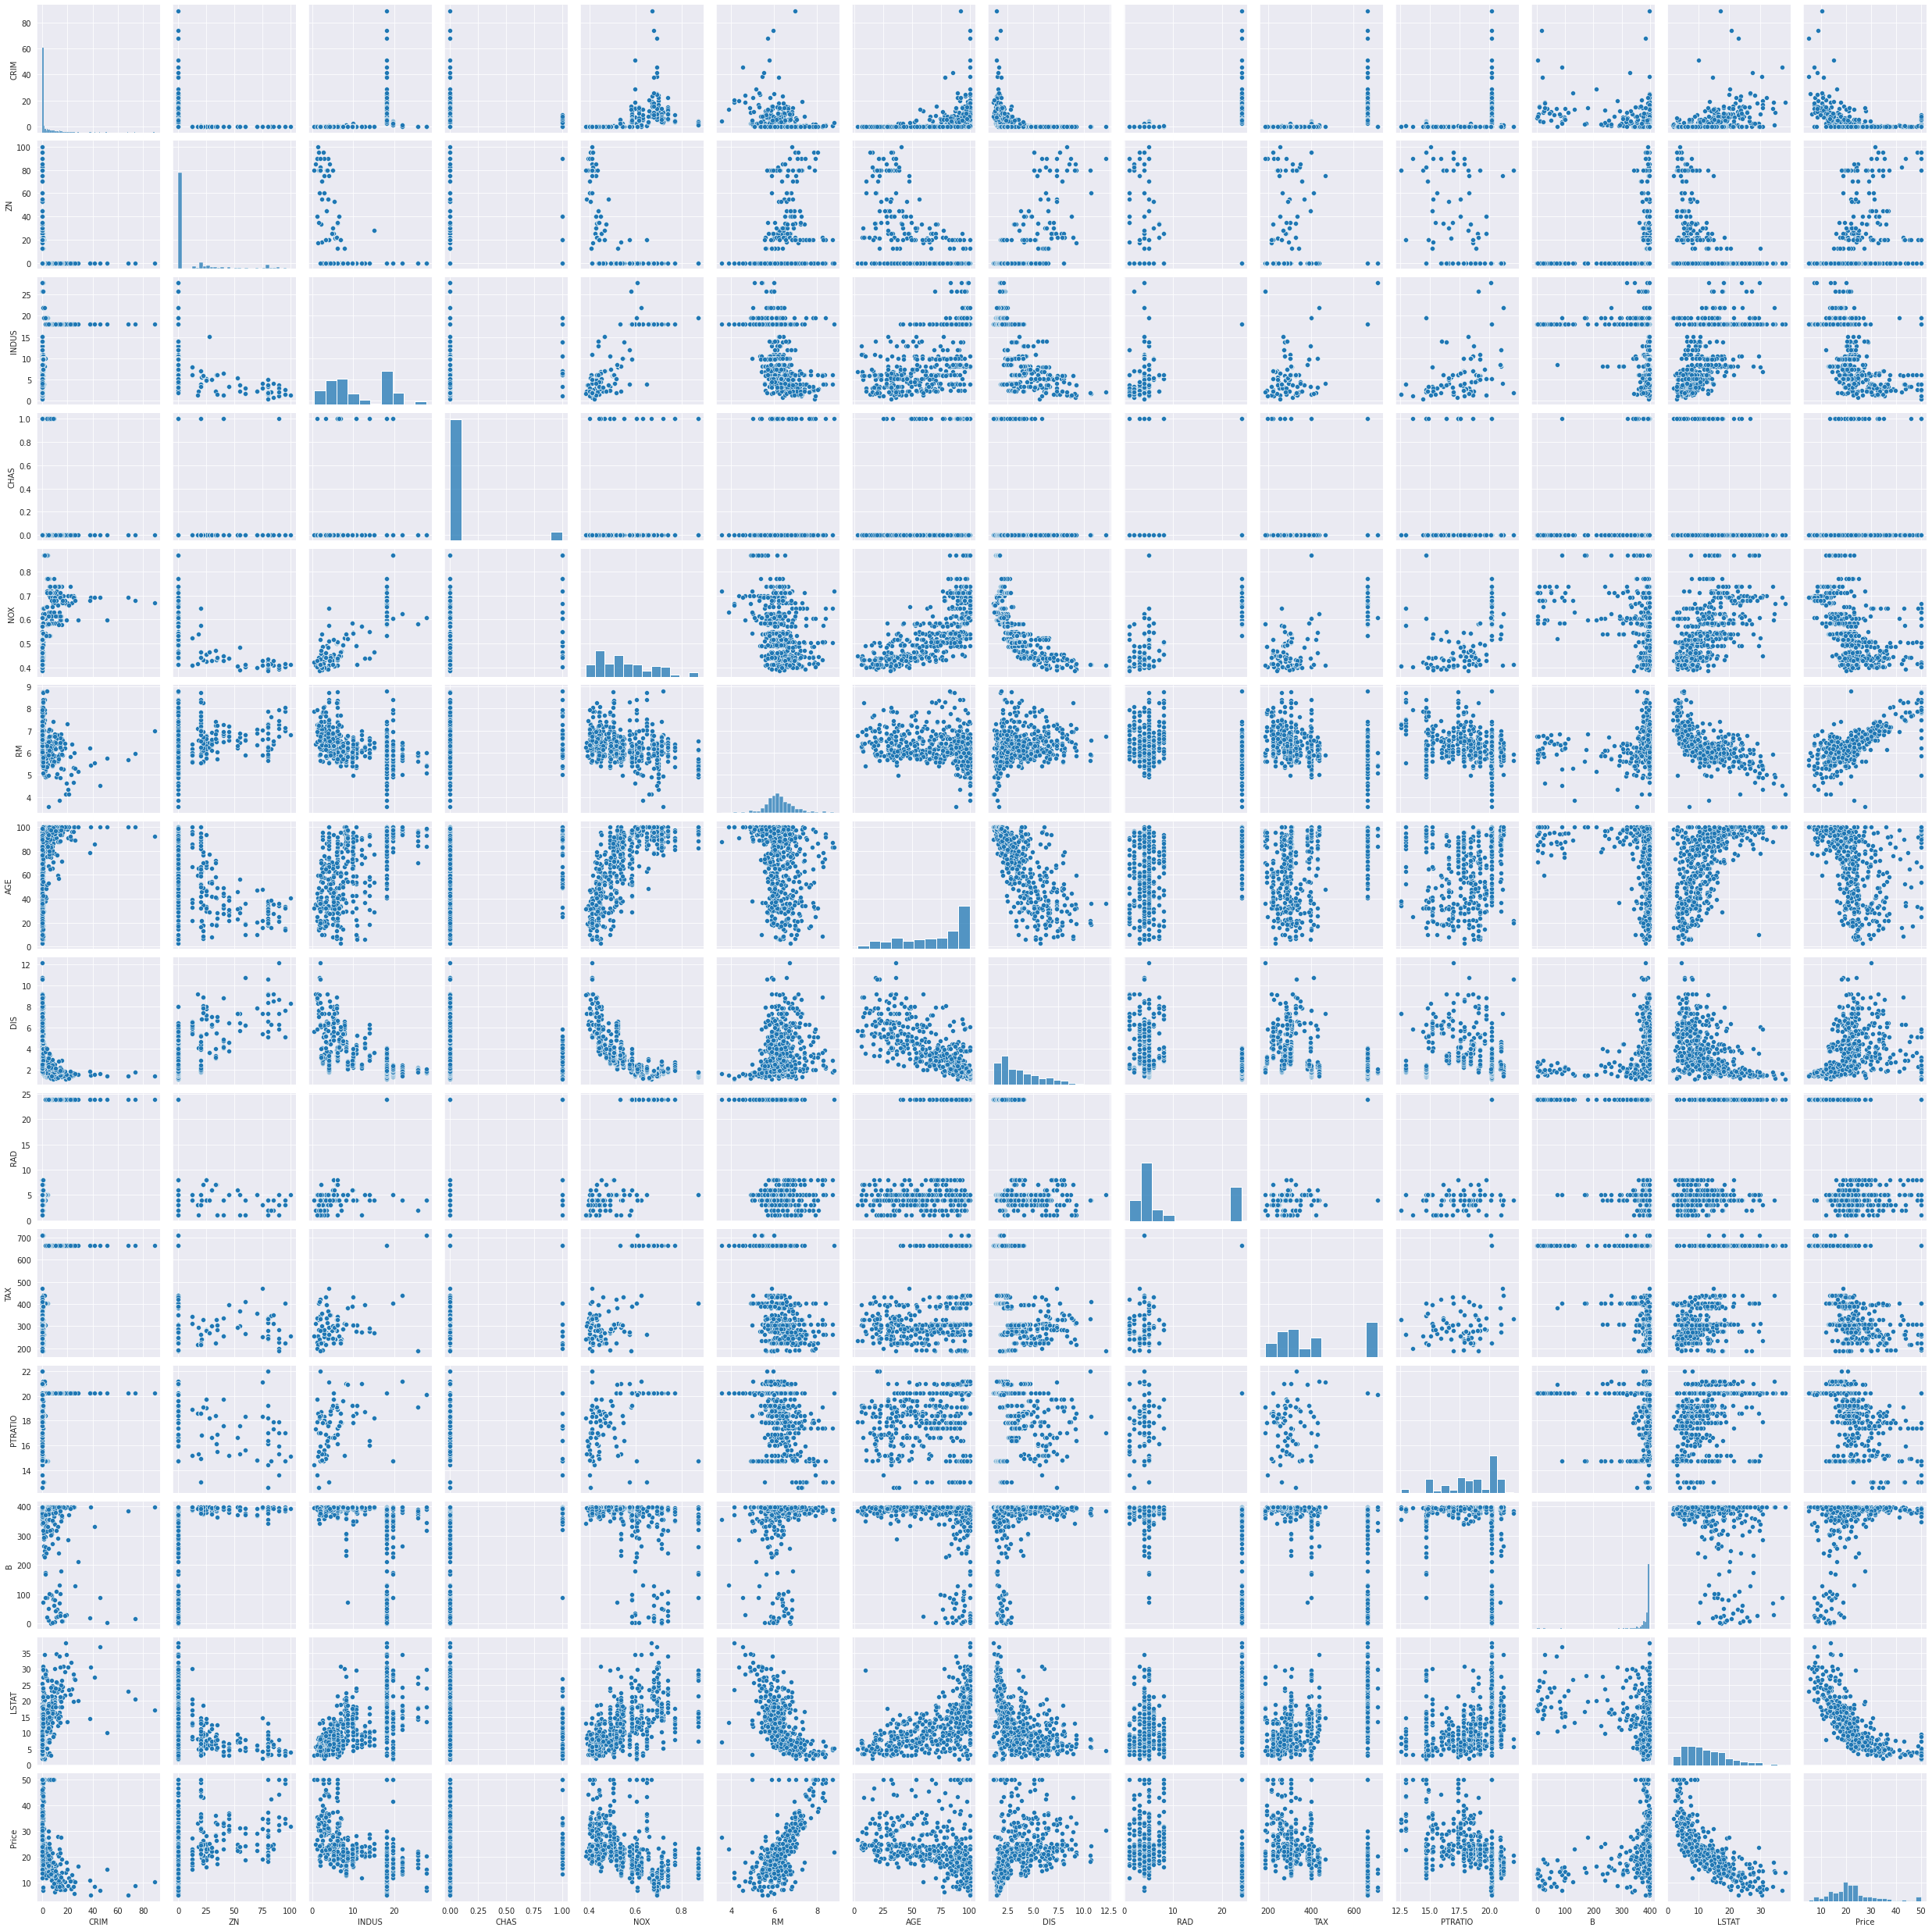

In [20]:

sns.set_style("darkgrid")
sns.pairplot(bos)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


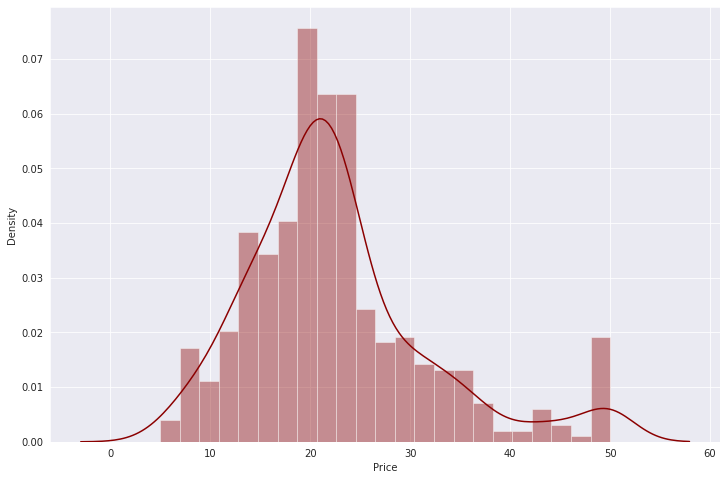

In [23]:
# Checking the distribution of the target variable:
plt.figure(figsize=(12,8))
sns.distplot(bos['Price'],color='darkred') 

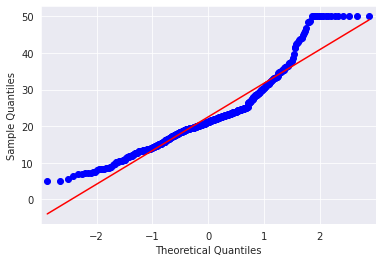

In [26]:
# Normality test:
qqplot(bos['Price'],line='s')
plt.show()

We can conclude that the the price column more or less follows a normal distribution.

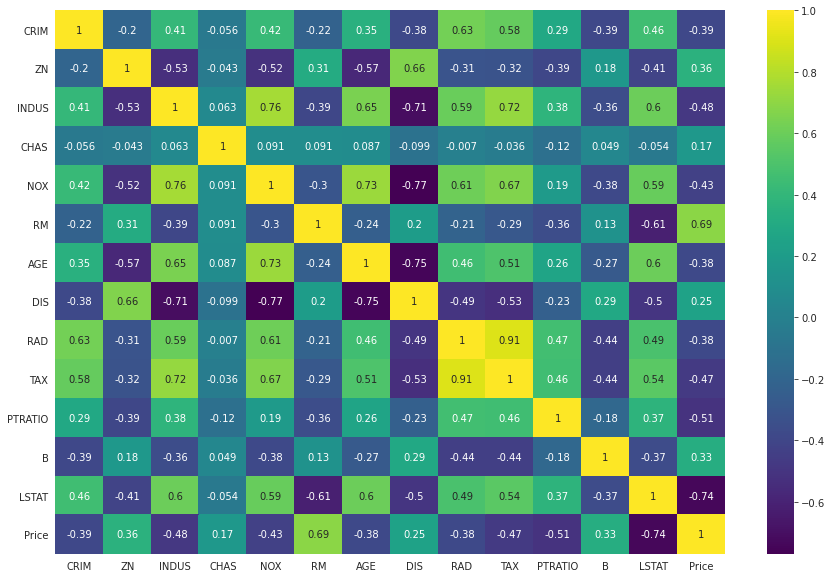

In [31]:
# Checking how each feature is correlated:
plt.figure(figsize=(15,10))
corr_matrix = bos.corr().round(3)
sns.heatmap(corr_matrix,cmap='viridis',annot=True)

In [35]:
# Splitting the data into train and test sets:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X = bos.drop(columns=['Price'])
y = bos['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [37]:
# Feature scaling:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Importing Linear Regression class:
from sklearn.linear_model import LinearRegression

# Instantiating:
reg_model = LinearRegression()

In [40]:
# Fitting:
reg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# print the intercept:
print(reg_model.intercept_)

29.836420163838774


In [44]:
# Coefficients:
pd.DataFrame(reg_model.coef_,X.columns,columns=['Coefficients'])

,Coefficients
CRIM,-0.128323
ZN,0.029552
INDUS,0.048859
CHAS,2.773503
NOX,-16.238829
RM,4.368755
AGE,-0.009248
DIS,-1.400867
RAD,0.257761
TAX,-0.009957


In [45]:
# Predictions:

pred = reg_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


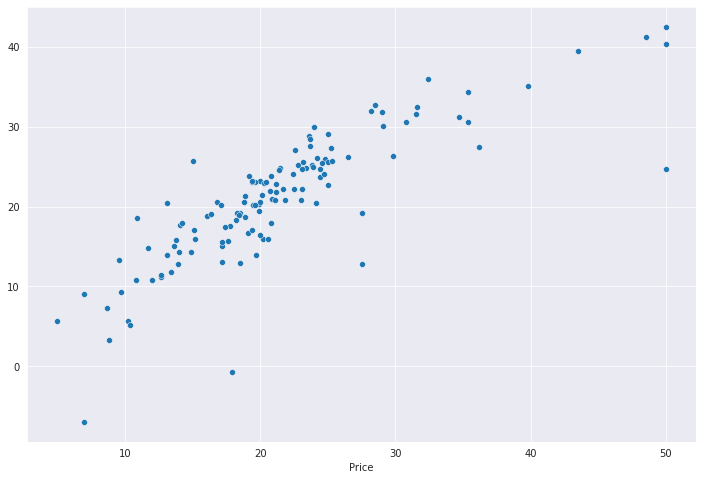

In [49]:
# Creating a scatterplot of the actual and predicted values:
plt.figure(figsize=(12,8))
sns.scatterplot(y_test,pred)
plt.show()

In [53]:
# Performance metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f'MAE: {mean_absolute_error(y_test, pred)}')
print(f'MSE: {mean_squared_error(y_test, pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, pred))}')
print(f'R2score: {r2_score(y_test, pred)}')

MAE: 3.060939595437054
MSE: 22.09869482709814
RMSE: 4.700924890603778
R2score: 0.6844267283527109
